In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [8]:
os.chdir("../data/TEST")

In [12]:
ls

bag.png        bag3.jpeg      shirt.png      watch.jpg
bag2.jpg       download.jpeg  tshirt.png


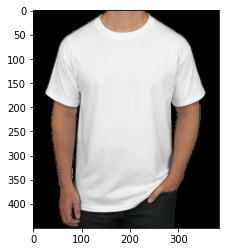

In [31]:
image = cv2.imread('tshirt.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


### RGB to Hex Conversion

In [32]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

### Get colors from an image


In [33]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    return image

In [43]:
def get_colors(image,number_of_colors,show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)

    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6));
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors);

    return rgb_colors


[array([193.66723893, 178.42166157, 168.9662611 ]),
 array([13.09058033, 11.04356811, 18.91406923]),
 array([54.61066982, 60.16592836, 84.52963416]),
 array([252.97384513, 252.46484764, 252.17089564])]

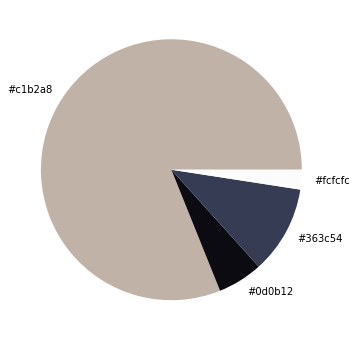

In [44]:
get_colors(get_image('download.jpeg'),4,True)